#üìå Extra√ß√£o

In [74]:
import pandas as pd
import numpy as np

In [75]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [76]:
df = pd.read_json(url)

In [77]:
df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [79]:
colunas = ['customer', 'phone', 'internet', 'account']

for coluna in colunas:
    df = pd.json_normalize(df[coluna]).merge(df, left_index=True, right_index=True)
    df = df.drop(columns=[coluna])


In [80]:
df.head()

Contract PaperlessBilling     PaymentMethod  Charges.Monthly  \
0        One year              Yes      Mailed check             65.6   
1  Month-to-month               No      Mailed check             59.9   
2  Month-to-month              Yes  Electronic check             73.9   
3  Month-to-month              Yes  Electronic check             98.0   
4  Month-to-month              Yes      Mailed check             83.9   

  Charges.Total InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0         593.3             DSL             No          Yes               No   
1         542.4             DSL             No           No               No   
2        280.85     Fiber optic             No           No              Yes   
3       1237.85     Fiber optic             No          Yes              Yes   
4         267.4     Fiber optic             No           No               No   

  TechSupport  ... StreamingMovies PhoneService MultipleLines  gender  \
0         Yes  ...              No          Yes            No  Female   
1          No  ...             Yes          Yes           Yes    Male   
2          No  ...              No          Yes            No    Male   
3          No  ...             Yes          Yes            No    Male   
4         Yes  ...              No          Yes            No  Female   

  SeniorCitizen  Partner Dependents tenure  customerID Churn  
0             0      Yes        Yes      9  0002-ORFBO    No  
1             0       No         No      9  0003-MKNFE    No  
2             0       No         No      4  0004-TLHLJ   Yes  
3             1      Yes         No     13  0011-IGKFF   Yes  
4             1      Yes         No      3  0013-EXCHZ   Yes  

[5 rows x 21 columns]

#üîß Transforma√ß√£o

In [81]:
df['Charges.Total'] = df['Charges.Total'].apply(lambda x: x.replace(' ', '0').strip())

In [82]:
df['Charges.Total'] = df['Charges.Total'].astype(np.float64)

In [83]:
df_colunas = list(df.columns)
df_colunas

['Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PhoneService',
 'MultipleLines',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'customerID',
 'Churn']

In [84]:
for coluna in df_colunas:
  if df[coluna].dtype == 'object':
    df[coluna] = df[coluna].str.lower()

In [85]:
df.columns = df.columns.str.lower().str.replace('.', '_')

In [86]:
df.head()

contract paperlessbilling     paymentmethod  charges_monthly  \
0        one year              yes      mailed check             65.6   
1  month-to-month               no      mailed check             59.9   
2  month-to-month              yes  electronic check             73.9   
3  month-to-month              yes  electronic check             98.0   
4  month-to-month              yes      mailed check             83.9   

   charges_total internetservice onlinesecurity onlinebackup deviceprotection  \
0         593.30             dsl             no          yes               no   
1         542.40             dsl             no           no               no   
2         280.85     fiber optic             no           no              yes   
3        1237.85     fiber optic             no          yes              yes   
4         267.40     fiber optic             no           no               no   

  techsupport  ... streamingmovies phoneservice multiplelines  gender  \
0         yes  ...              no          yes            no  female   
1          no  ...             yes          yes           yes    male   
2          no  ...              no          yes            no    male   
3          no  ...             yes          yes            no    male   
4         yes  ...              no          yes            no  female   

  seniorcitizen  partner dependents tenure  customerid churn  
0             0      yes        yes      9  0002-orfbo    no  
1             0       no         no      9  0003-mknfe    no  
2             0       no         no      4  0004-tlhlj   yes  
3             1      yes         no     13  0011-igkff   yes  
4             1      yes         no      3  0013-exchz   yes  

[5 rows x 21 columns]

In [87]:
df['compras_diarias'] = df['charges_monthly'] / 30

In [88]:
df.head()

contract paperlessbilling     paymentmethod  charges_monthly  \
0        one year              yes      mailed check             65.6   
1  month-to-month               no      mailed check             59.9   
2  month-to-month              yes  electronic check             73.9   
3  month-to-month              yes  electronic check             98.0   
4  month-to-month              yes      mailed check             83.9   

   charges_total internetservice onlinesecurity onlinebackup deviceprotection  \
0         593.30             dsl             no          yes               no   
1         542.40             dsl             no           no               no   
2         280.85     fiber optic             no           no              yes   
3        1237.85     fiber optic             no          yes              yes   
4         267.40     fiber optic             no           no               no   

  techsupport  ... phoneservice multiplelines  gender seniorcitizen partner  \
0         yes  ...          yes            no  female             0     yes   
1          no  ...          yes           yes    male             0      no   
2          no  ...          yes            no    male             0      no   
3          no  ...          yes            no    male             1     yes   
4         yes  ...          yes            no  female             1     yes   

   dependents tenure  customerid  churn compras_diarias  
0         yes      9  0002-orfbo     no        2.186667  
1          no      9  0003-mknfe     no        1.996667  
2          no      4  0004-tlhlj    yes        2.463333  
3          no     13  0011-igkff    yes        3.266667  
4          no      3  0013-exchz    yes        2.796667  

[5 rows x 22 columns]

In [89]:
df[['paperlessbilling','onlinesecurity','onlinebackup','deviceprotection','techsupport','phoneservice',
    'multiplelines','partner','dependents','churn']] = df[['paperlessbilling','onlinesecurity','onlinebackup','deviceprotection',
                                                           'techsupport','phoneservice','multiplelines','partner',
                                                           'dependents','churn']].map(lambda x: x.replace('yes', '1').replace('no', '0').strip())

In [90]:
df['multiplelines'] = df['multiplelines'].replace('0 phone service', '0')

In [91]:
df[['techsupport','deviceprotection','onlinebackup','onlinesecurity']] = df[['techsupport','deviceprotection','onlinebackup','onlinesecurity']].map(lambda x: x.replace('0 internet service', '0'))

In [92]:
df['churn'].unique()

array(['0', '1', ''], dtype=object)

In [93]:
#df['churn'] = df['churn'].str.replace('','0',regex=True)

In [94]:
#df['churn'] = df['churn'].str.replace('000','0').replace('010','1')

In [95]:
df[['paperlessbilling','onlinesecurity','onlinebackup','deviceprotection','techsupport','phoneservice',
    'multiplelines','partner','dependents']] = df[['paperlessbilling','onlinesecurity','onlinebackup','deviceprotection','techsupport','phoneservice',
    'multiplelines','partner','dependents']].astype(np.int64)

In [96]:
df = df.rename(columns={'contract': 'contrato'})
df = df.rename(columns={'paperlessbilling': 'fatura_on_line'})
df = df.rename(columns={'paymentmethod': 'metodo_pagamento'})
df = df.rename(columns={'charges_monthly': 'gasto_mensal'})
df = df.rename(columns={'charges_total': 'gasto_total'})
df = df.rename(columns={'internetservice': 'servico_internet'})
df = df.rename(columns={'onlinesecurity': 'seguranca_online'})
df = df.rename(columns={'onlinebackup': 'backup_online'})
df = df.rename(columns={'deviceprotection': 'protecao_dispositivo'})
df = df.rename(columns={'techsupport': 'suporte_tecnico'})
df = df.rename(columns={'streamingtv': 'tv_cabo'})
df = df.rename(columns={'streamingmovies': 'streaming_filmes'})
df = df.rename(columns={'phoneservice': 'servico_telefone'})
df = df.rename(columns={'multiplelines': 'multiplas_linhas'})
df = df.rename(columns={'gender': 'genero'})
df = df.rename(columns={'seniorcitizen': 'idoso_maior_65'})
df = df.rename(columns={'partner': 'possui_parceira'})
df = df.rename(columns={'dependents': 'dependentes'})
df = df.rename(columns={'tenure': 'tempo_contrato'})
df = df.rename(columns={'customerid': 'id_cliente'})
df = df.rename(columns={'churn': 'evadido'})

In [97]:
df.head()

contrato  fatura_on_line  metodo_pagamento  gasto_mensal  \
0        one year               1      mailed check          65.6   
1  month-to-month               0      mailed check          59.9   
2  month-to-month               1  electronic check          73.9   
3  month-to-month               1  electronic check          98.0   
4  month-to-month               1      mailed check          83.9   

   gasto_total servico_internet  seguranca_online  backup_online  \
0       593.30              dsl                 0              1   
1       542.40              dsl                 0              0   
2       280.85      fiber optic                 0              0   
3      1237.85      fiber optic                 0              1   
4       267.40      fiber optic                 0              0   

   protecao_dispositivo  suporte_tecnico  ... servico_telefone  \
0                     0                1  ...                1   
1                     0                0  ...                1   
2                     1                0  ...                1   
3                     1                0  ...                1   
4                     0                1  ...                1   

  multiplas_linhas  genero  idoso_maior_65 possui_parceira  dependentes  \
0                0  female               0               1            1   
1                1    male               0               0            0   
2                0    male               0               0            0   
3                0    male               1               1            0   
4                0  female               1               1            0   

   tempo_contrato  id_cliente  evadido compras_diarias  
0               9  0002-orfbo        0        2.186667  
1               9  0003-mknfe        0        1.996667  
2               4  0004-tlhlj        1        2.463333  
3              13  0011-igkff        1        3.266667  
4               3  0013-exchz        1        2.796667  

[5 rows x 22 columns]

#üìä Carga e an√°lise

In [98]:
df_cli_evadidos = df.query('evadido=="1"')
df_cli_nao_evadidos = df.query('evadido=="0"')
df_cli_desconhecidos = df.query('evadido==""')

In [99]:
df_cli_evadidos['contrato'].value_counts()

contrato
month-to-month    1655
one year           166
two year            48
Name: count, dtype: int64

In [100]:
df_cli_nao_evadidos['contrato'].value_counts()

contrato
month-to-month    2220
two year          1647
one year          1307
Name: count, dtype: int64

## An√°lise da distribui√ß√£o de evadidos

Verificando a propor√ß√£o de clientes que evadiram para entender o equil√≠brio do dataset.


In [101]:
churn_counts = df['evadido'].value_counts()
churn_proportions = df['evadido'].value_counts(normalize=True)

print("Contagem de evadidos:")
print(churn_counts)
print("\nPropor√ß√£o de evadidos:")
print(churn_proportions)

Contagem de evadidos:
evadido
0    5174
1    1869
      224
Name: count, dtype: int64

Propor√ß√£o de evadidos:
evadido
0    0.711986
1    0.257190
     0.030824
Name: proportion, dtype: float64


##An√°lise de vari√°veis categ√≥ricas e evadidos
Explorar a rela√ß√£o entre as vari√°veis categ√≥ricas (como tipo de contrato, servi√ßo de internet, m√©todo de pagamento, etc.) e evadidos, usando contagens e visualiza√ß√µes.


In [102]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'id_cliente' and df[col].nunique() < 50]

for col in categorical_cols:
    print(f"\nAnalizando coluna: {col}")
    churn_counts = df_cli_evadidos[col].value_counts()
    non_churn_counts = df_cli_nao_evadidos[col].value_counts()
    print(f"Clientes evadidos:\n{churn_counts}")
    print(f"Clientes n√£o evadidos:\n{non_churn_counts}")


Analizando coluna: contrato
Clientes evadidos:
contrato
month-to-month    1655
one year           166
two year            48
Name: count, dtype: int64
Clientes n√£o evadidos:
contrato
month-to-month    2220
two year          1647
one year          1307
Name: count, dtype: int64

Analizando coluna: metodo_pagamento
Clientes evadidos:
metodo_pagamento
electronic check             1071
mailed check                  308
bank transfer (automatic)     258
credit card (automatic)       232
Name: count, dtype: int64
Clientes n√£o evadidos:
metodo_pagamento
mailed check                 1304
electronic check             1294
credit card (automatic)      1290
bank transfer (automatic)    1286
Name: count, dtype: int64

Analizando coluna: servico_internet
Clientes evadidos:
servico_internet
fiber optic    1297
dsl             459
no              113
Name: count, dtype: int64
Clientes n√£o evadidos:
servico_internet
dsl            1962
fiber optic    1799
no             1413
Name: count, dtype: in

Identificando colunas categ√≥ricas, verificando seus tipos de dados e o n√∫mero de valores exclusivos e, em seguida, iterando por essas colunas para calcular e exibir contagens de valores para clientes evadidos e n√£o evadidos.

C√°lculo da propor√ß√£o de rotatividade dentro de cada categoria para as colunas categ√≥ricas identificadas para entender a rela√ß√£o entre essas vari√°veis e a rotatividade(churn).

In [103]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'id_cliente' and col != 'evadido' and df[col].nunique() < 50]

for col in categorical_cols:
    print(f"\nPropor√ß√£o de evadido por {col}:")
    churn_proportion = df.groupby(col)['evadido'].value_counts(normalize=True).unstack().fillna(0)
    if '1' in churn_proportion.columns and ('0' in churn_proportion.columns or '' in churn_proportion.columns):
        churn_proportion['evadido_rate'] = churn_proportion['1']
        print(churn_proportion[['evadido_rate']].sort_values(by='evadido_rate', ascending=False))
    else:
        print("Dados de rotatividade (evadido) insuficientes para calcular a propor√ß√£o.")


Propor√ß√£o de evadido por contrato:
evadido         evadido_rate
contrato                    
month-to-month      0.413233
one year            0.109282
two year            0.027539

Propor√ß√£o de evadido por metodo_pagamento:
evadido                    evadido_rate
metodo_pagamento                       
electronic check               0.438037
mailed check                   0.184985
bank transfer (automatic)      0.162366
credit card (automatic)        0.147959

Propor√ß√£o de evadido por servico_internet:
evadido           evadido_rate
servico_internet              
fiber optic           0.405566
dsl                   0.184486
no                    0.071474

Propor√ß√£o de evadido por tv_cabo:
evadido              evadido_rate
tv_cabo                          
no                       0.325276
yes                      0.291756
no internet service      0.071474

Propor√ß√£o de evadido por streaming_filmes:
evadido              evadido_rate
streaming_filmes                 
no       

Visualizar a rela√ß√£o entre vari√°veis categ√≥ricas e a rotatividade usando gr√°ficos de barras para tornar os padr√µes e as diferen√ßas nas taxas de rotatividade entre as categorias mais interpret√°veis, percorrendo as colunas categ√≥ricas identificadas e criando um gr√°fico de barras para cada uma, mostrando a taxa de rotatividade por categoria.



## An√°lise de vari√°veis num√©ricas e evadido (churn)

Investigar a rela√ß√£o entre as vari√°veis num√©ricas (como `gasto_mensal`, `gasto_total`, `tempo_contrato`, `compras_diarias`) e evadido, usando estat√≠sticas descritivas e visualiza√ß√µes (como box plots e histogramas).



Analizando coluna: gasto_mensal
Estat√≠sticas descritivas para clientes evadidos:


count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: gasto_mensal, dtype: float64


Estat√≠sticas descritivas para clientes n√£o evadidos:


count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: gasto_mensal, dtype: float64


Analizando coluna: gasto_total
Estat√≠sticas descritivas para clientes evadidos:


count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: gasto_total, dtype: float64


Estat√≠sticas descritivas para clientes n√£o evadidos:


count    5174.000000
mean     2549.911442
std      2329.954215
min         0.000000
25%       572.900000
50%      1679.525000
75%      4262.850000
max      8672.450000
Name: gasto_total, dtype: float64


Analizando coluna: tempo_contrato
Estat√≠sticas descritivas para clientes evadidos:


count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tempo_contrato, dtype: float64


Estat√≠sticas descritivas para clientes n√£o evadidos:


count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tempo_contrato, dtype: float64


Analizando coluna: compras_diarias
Estat√≠sticas descritivas para clientes evadidos:


count    1869.000000
mean        2.481378
std         0.822202
min         0.628333
25%         1.871667
50%         2.655000
75%         3.140000
max         3.945000
Name: compras_diarias, dtype: float64


Estat√≠sticas descritivas para clientes n√£o evadidos:


count    5174.000000
mean        2.042171
std         1.036422
min         0.608333
25%         0.836667
50%         2.147500
75%         2.946667
max         3.958333
Name: compras_diarias, dtype: float64

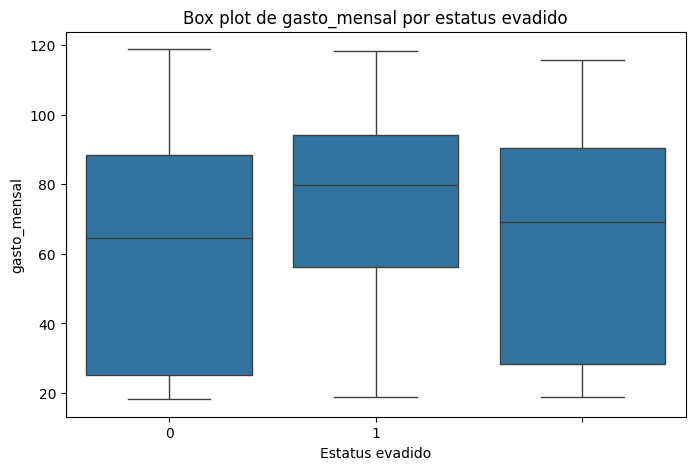

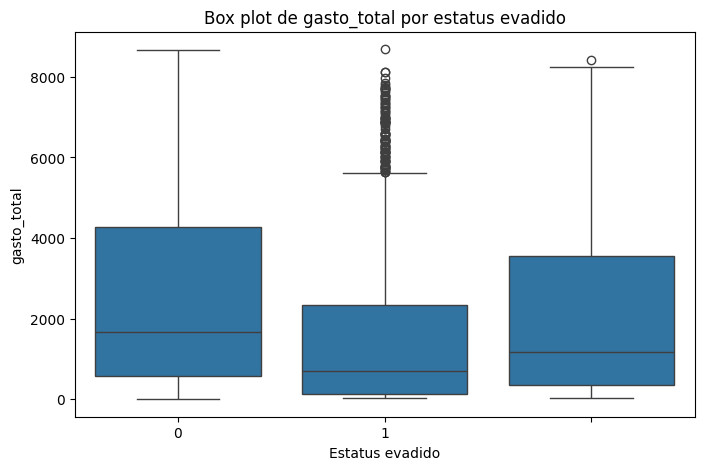

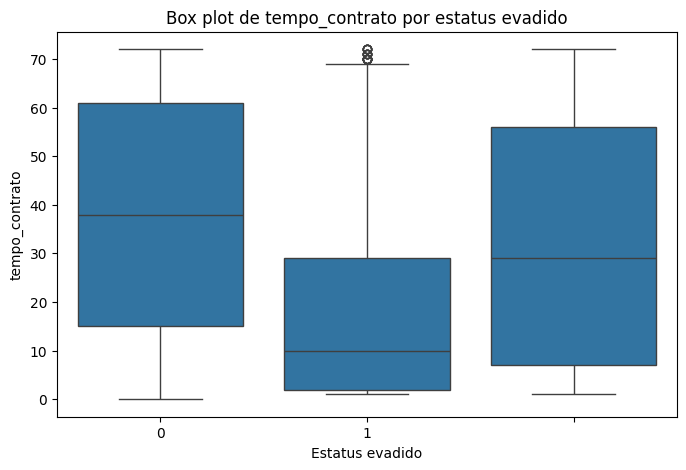

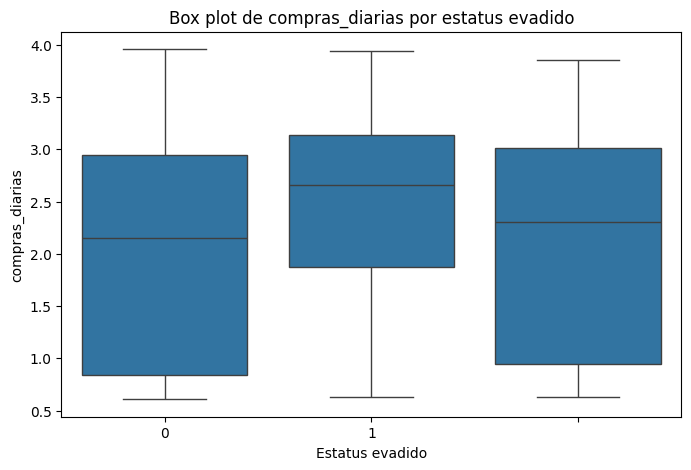

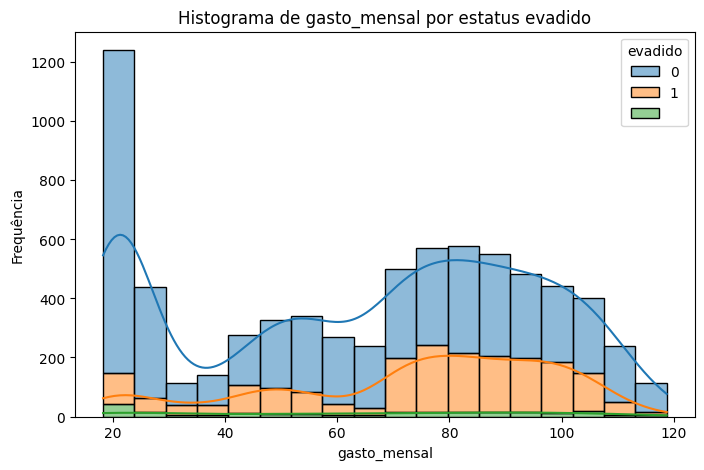

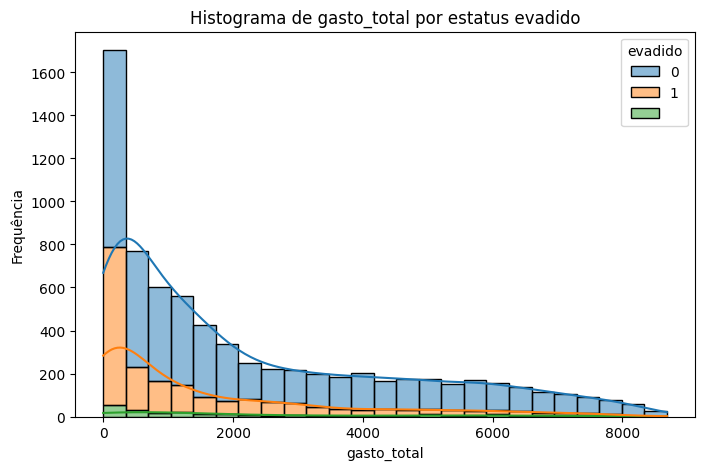

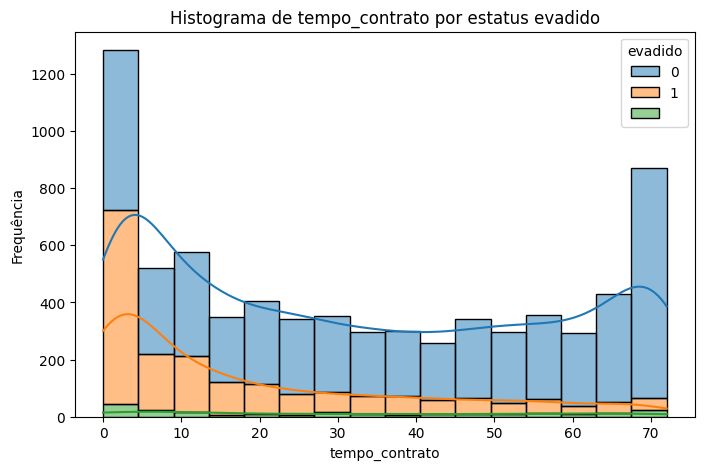

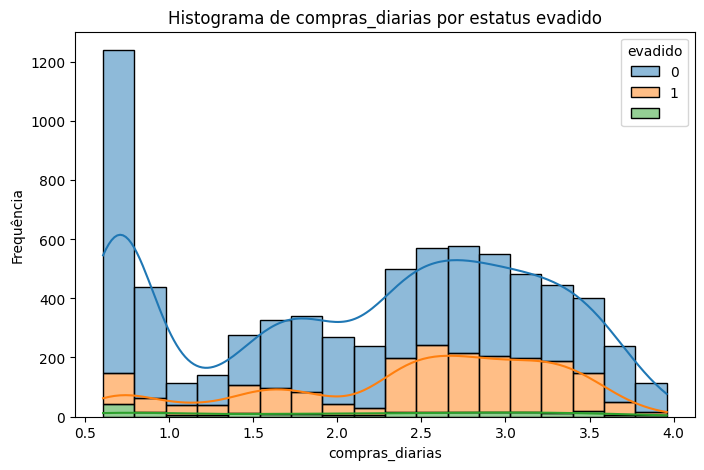

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['gasto_mensal', 'gasto_total', 'tempo_contrato', 'compras_diarias']

for col in numerical_cols:
    print(f"\nAnalizando coluna: {col}")
    print("Estat√≠sticas descritivas para clientes evadidos:")
    display(df_cli_evadidos[col].describe())
    print("\nEstat√≠sticas descritivas para clientes n√£o evadidos:")
    display(df_cli_nao_evadidos[col].describe())

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='evadido', y=col, data=df)
    plt.title(f'Box plot de {col} por estatus evadido')
    plt.xlabel('Estatus evadido')
    plt.ylabel(col)
    plt.show()

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='evadido', kde=True, multiple="stack")
    plt.title(f'Histograma de {col} por estatus evadido')
    plt.xlabel(col)
    plt.ylabel('Frequ√™ncia')
    plt.show()

## An√°lise de correla√ß√£o

Calculando a correla√ß√£o entre as vari√°veis num√©ricas e evadidos (ap√≥s converter 'evadido' para num√©rico) para identificar relacionamentos lineares.


Criando uma c√≥pia do DataFrame, convertendo a coluna 'evadido' em num√©rica, selecionando as colunas num√©ricas e calculando a matriz de correla√ß√£o.



In [105]:
df_copy = df.copy()
df_copy['evadido_numerico'] = df_copy['evadido'].replace({'0': 0, '1': 1, '': 2}).astype(int)
numerical_colms = df_copy.select_dtypes(include=np.number).columns
correlation_matrix = df_copy[numerical_colms].corr()
display(correlation_matrix)

/tmp/ipython-input-105-1713143426.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['evadido_numerico'] = df_copy['evadido'].replace({'0': 0, '1': 1, '': 2}).astype(int)


fatura_on_line  gasto_mensal  gasto_total  \
fatura_on_line              1.000000      0.353714     0.160023   
gasto_mensal                0.353714      1.000000     0.652211   
gasto_total                 0.160023      0.652211     1.000000   
seguranca_online           -0.001693      0.298307     0.412764   
backup_online               0.131187      0.442974     0.512027   
protecao_dispositivo        0.105211      0.483590     0.523836   
suporte_tecnico             0.037581      0.338429     0.431032   
servico_telefone            0.013624      0.246709     0.113985   
multiplas_linhas            0.163225      0.490699     0.468405   
idoso_maior_65              0.157734      0.220388     0.104076   
possui_parceira            -0.011201      0.097122     0.315409   
dependentes                -0.111752     -0.115832     0.061474   
tempo_contrato              0.007949      0.247982     0.825407   
compras_diarias             0.353714      1.000000     0.652211   
evadido_numerico            0.162062      0.152092    -0.164170   

                      seguranca_online  backup_online  protecao_dispositivo  \
fatura_on_line               -0.001693       0.131187              0.105211   
gasto_mensal                  0.298307       0.442974              0.483590   
gasto_total                   0.412764       0.512027              0.523836   
seguranca_online              1.000000       0.286432              0.275699   
backup_online                 0.286432       1.000000              0.306665   
protecao_dispositivo          0.275699       0.306665              1.000000   
suporte_tecnico               0.356113       0.292422              0.332267   
servico_telefone             -0.093341      -0.052165             -0.073033   
multiplas_linhas              0.098396       0.205156              0.202172   
idoso_maior_65               -0.037953       0.068824              0.060358   
possui_parceira               0.141392       0.139523              0.153209   
dependentes                   0.083951       0.023686              0.014797   
tempo_contrato                0.327252       0.361291              0.361792   
compras_diarias               0.298307       0.442974              0.483590   
evadido_numerico             -0.143919      -0.068750             -0.061069   

                      suporte_tecnico  servico_telefone  multiplas_linhas  \
fatura_on_line               0.037581          0.013624          0.163225   
gasto_mensal                 0.338429          0.246709          0.490699   
gasto_total                  0.431032          0.113985          0.468405   
seguranca_online             0.356113         -0.093341          0.098396   
backup_online                0.292422         -0.052165          0.205156   
protecao_dispositivo         0.332267         -0.073033          0.202172   
suporte_tecnico              1.000000         -0.097573          0.098053   
servico_telefone            -0.097573          1.000000          0.280379   
multiplas_linhas             0.098053          0.280379          1.000000   
idoso_maior_65              -0.059376          0.010060          0.144567   
possui_parceira              0.116228          0.018828          0.141187   
dependentes                  0.062586         -0.003863         -0.027894   
tempo_contrato               0.322139          0.010205          0.331678   
compras_diarias              0.338429          0.246709          0.490699   
evadido_numerico            -0.138382          0.004765          0.032063   

                      idoso_maior_65  possui_parceira  dependentes  \
fatura_on_line              0.157734        -0.011201    -0.111752   
gasto_mensal                0.220388         0.097122    -0.115832   
gasto_total                 0.104076         0.315409     0.061474   
seguranca_online           -0.037953         0.141392     0.083951   
backup_online               0.068824         0.139523     0.023686   
protecao_dispositivo        0.0

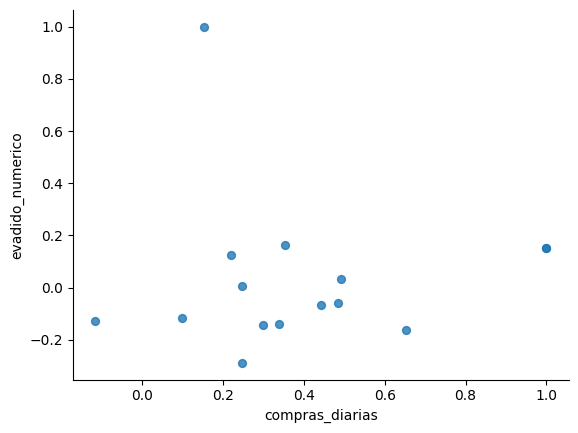

In [106]:
# @title compras di√°rias vs evadidos

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='compras_diarias', y='evadido_numerico', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#üìÑRelat√≥rio Final

##Introdu√ß√£o

Este √© o projeto "Churn de Clientes" da empresa <b>Telecom X</b>. O objetivo aqui √© entender o porqu√™ da empresa enfrentar um alto √≠ndice de cancelamentos de clientes atrav√©s da an√°lise de dados de seus clientes.

##Limpeza e tratamento de dados:


1.   Ap√≥s a importa√ß√£o da biblioteca Pandas foi feito a importa√ß√£o do arquivo .json atrav√©s da url: 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
2.   Feito a normaliza√ß√£o com o comando *'json_normalize'*, o problema aqui foi que os dados estavam agrupados em forma de dicion√°rio, impossibilitando utilizar o comando *'explode'* para desagrupar todas as colunas de uma s√≥ vez, ent√£o foi preciso criar uma fun√ß√£o para executar essa tarefa.
3. Utilizado o gasto mensal por cliente para criar uma coluna de compras di√°rias e proporcionar uma vis√£o mais detalhada do comportamento dos clientes ao longo do tempo.
4. Verificado e corrigido algumas inconsist√™ncias de dados como ' , ' separando casas decimais em colunas que precisariam ser num√©ricas, espa√ßos em branco, valores duplicados.
5. Colunas num√©ricas estilo moeda foram transformadas para o tipo *'float64'*
6. Colunas que continham dados como *'yes, no, 1 e 2'*, foram transformadas para o tipo *'int64'* para padronizaar, facilitar o processamento matem√°tico e a aplica√ß√£o de modelos anal√≠ticos.
7. As colunas foram renomeadas para a Lingua Portuguesa com o intuito de dar mais clareza na leitura dos dados com o minimo de mix de linguas.



##An√°lise Explorat√≥ria de Dados:

1. Verificado a propor√ß√£o de clientes que evadiram para entender o equil√≠brio do dataset.
2. Explorado a rela√ß√£o entre as vari√°veis categ√≥ricas (como tipo de contrato, servi√ßo de internet, m√©todo de pagamento, etc.) e evadidos, usando contagens e visualiza√ß√µes.
3. Identificado colunas categ√≥ricas, verificando seus tipos de dados e o n√∫mero de valores exclusivos e, em seguida, iterando por essas colunas para calcular e exibir contagens de valores para clientes evadidos e n√£o evadidos.
4. C√°lculo da propor√ß√£o de rotatividade dentro de cada categoria para as colunas categ√≥ricas identificadas para entender a rela√ß√£o entre essas vari√°veis e a rotatividade(churn).
5. Rela√ß√£o entre vari√°veis categ√≥ricas e a rotatividade, usando gr√°ficos de barras para tornar os padr√µes e as diferen√ßas nas taxas de rotatividade entre as categorias mais interpret√°veis.


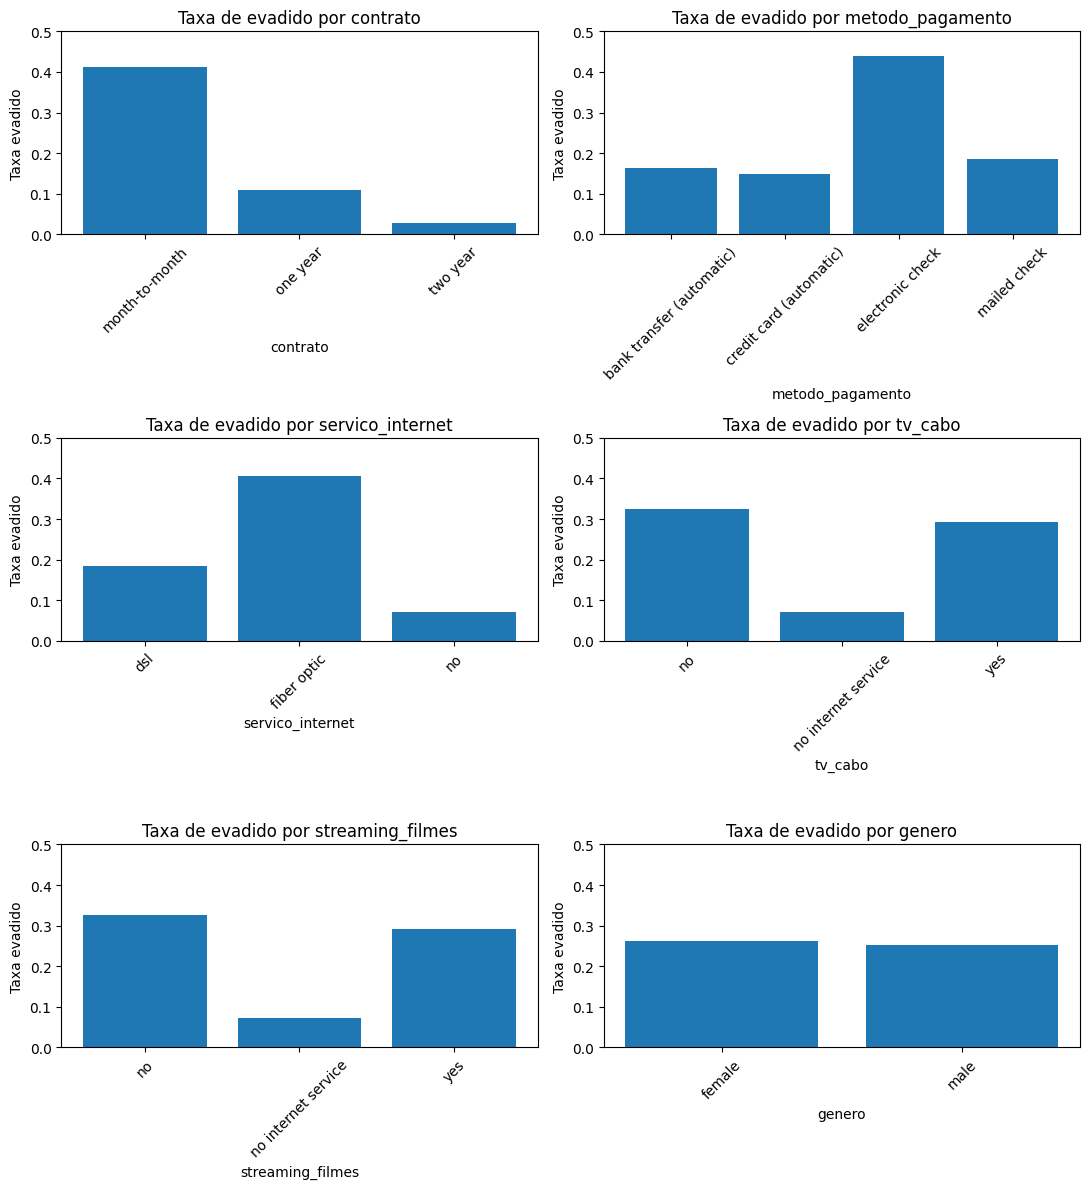

In [108]:
#@title .
import matplotlib.pyplot as plt
import seaborn as sns
colum = 1

fig, axs = plt.subplots(3,2, figsize=(11,12))
for col in categorical_cols:
    lin = categorical_cols.index(col)

    churn_proportion = df.groupby(col)['evadido'].value_counts(normalize=True).unstack().fillna(0)
    if '1' in churn_proportion.columns and ('0' in churn_proportion.columns or '' in churn_proportion.columns):
        churn_proportion['churn_rate'] = churn_proportion['1']
        #sns.barplot(x=churn_proportion.index, y='churn_rate', data=churn_proportion.sort_values(by='churn_rate', ascending=False))

        if(np.mod(colum,2) != 0):
          if(colum > 0) : lin = colum - (lin // 2) - 1
          axs[lin,0].bar(churn_proportion.index, churn_proportion['churn_rate'])
          axs[lin,0].set_title(f'Taxa de evadido por {col}')
          axs[lin,0].set_xlabel(col)
          axs[lin,0].set_ylabel('Taxa evadido')
          axs[lin,0].tick_params(axis='x', rotation=45) # Use tick_params to rotate labels
        else:
          lin = colum // 2
          axs[lin-1,1].bar(churn_proportion.index, churn_proportion['churn_rate'])
          axs[lin-1,1].set_title(f'Taxa de evadido por {col}')
          axs[lin-1,1].set_xlabel(col)
          axs[lin-1,1].set_ylabel('Taxa evadido')
          axs[lin-1,1].tick_params(axis='x', rotation=45) # Use tick_params to rotate labels
        colum += 1
ymin = 0.0
ymax = 0.5

for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)

fig.tight_layout()
plt.show()

6. An√°lise de vari√°veis num√©ricas e evadido:
- Investigando a rela√ß√£o entre as vari√°veis num√©ricas (como gasto_mensal, gasto_total, tempo_contrato, compras_diarias) e evadido, usando estat√≠sticas descritivas e visualiza√ß√µes (como box plots e histogramas).

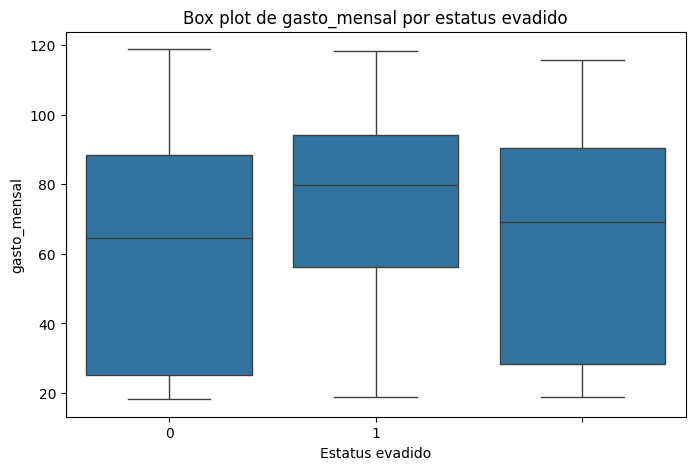

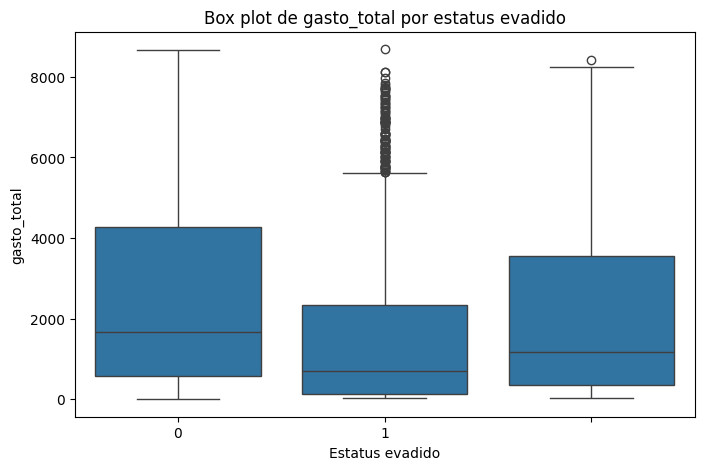

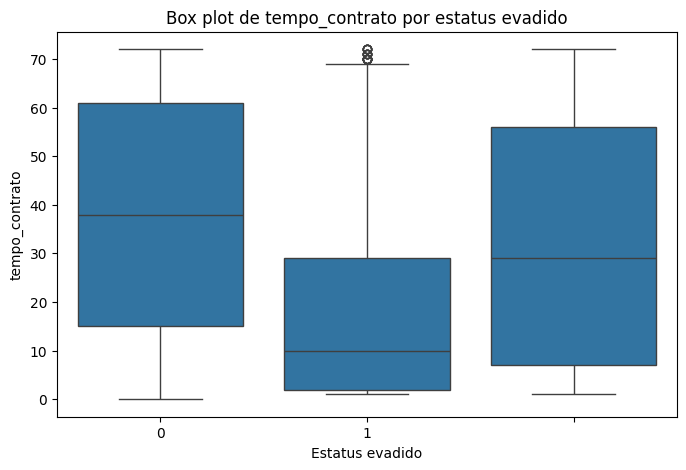

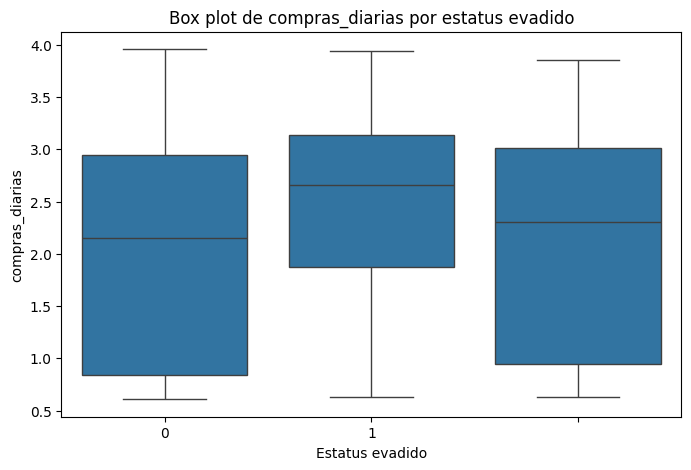

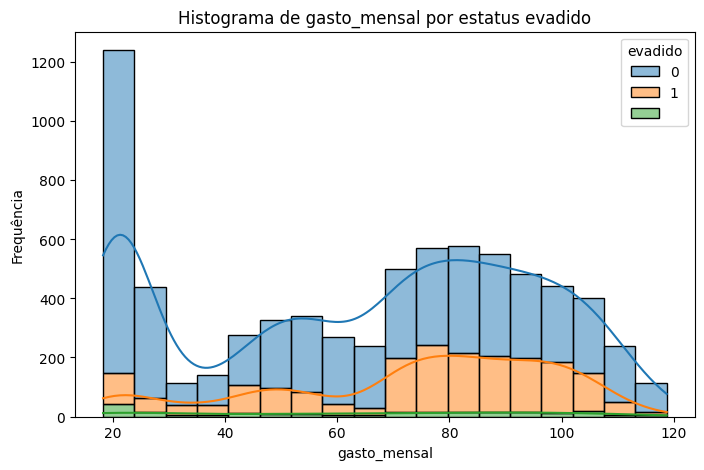

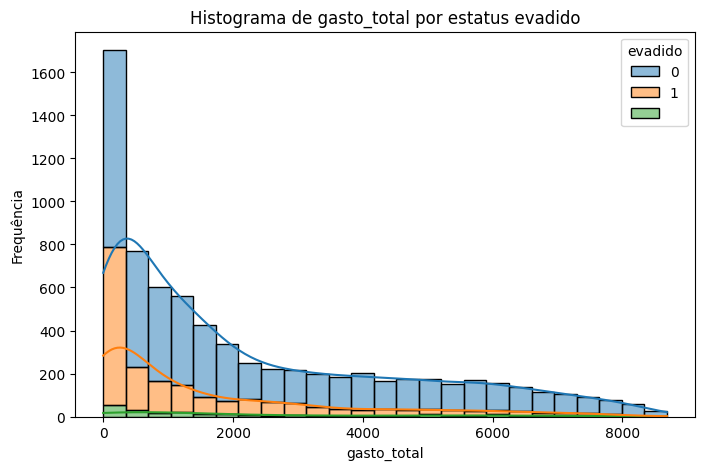

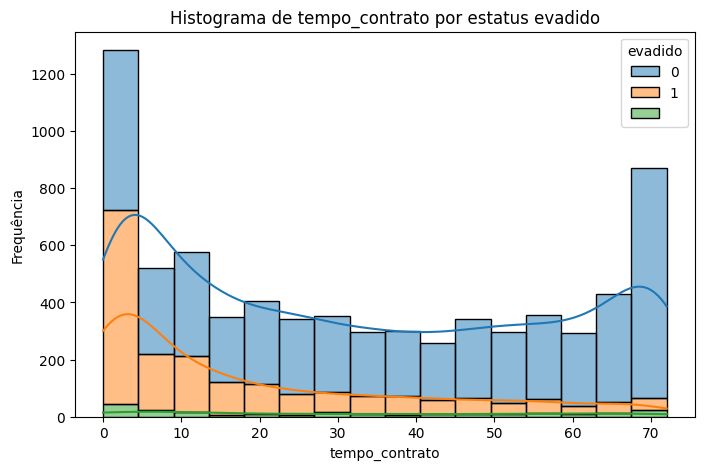

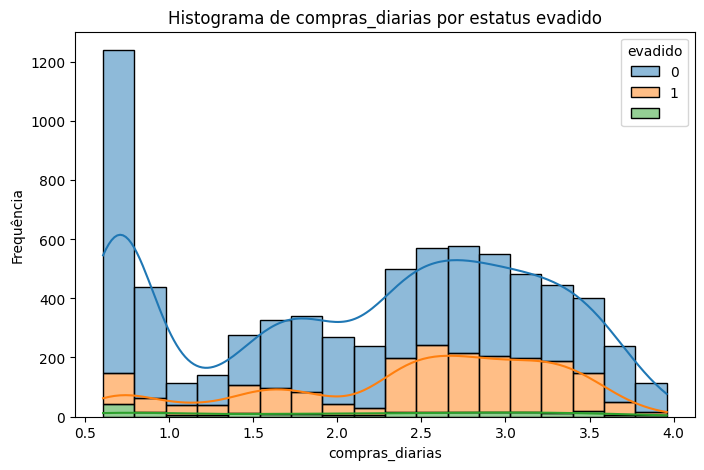

In [109]:
#@title .
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='evadido', y=col, data=df)
    plt.title(f'Box plot de {col} por estatus evadido')
    plt.xlabel('Estatus evadido')
    plt.ylabel(col)
    plt.show()

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='evadido', kde=True, multiple="stack")
    plt.title(f'Histograma de {col} por estatus evadido')
    plt.xlabel(col)
    plt.ylabel('Frequ√™ncia')
    plt.show()

7. An√°lise de correla√ß√£o:
- Calculado a correla√ß√£o entre as vari√°veis num√©ricas e evadidos (ap√≥s converter 'evadido' para num√©rico) para identificar relacionamentos lineares.

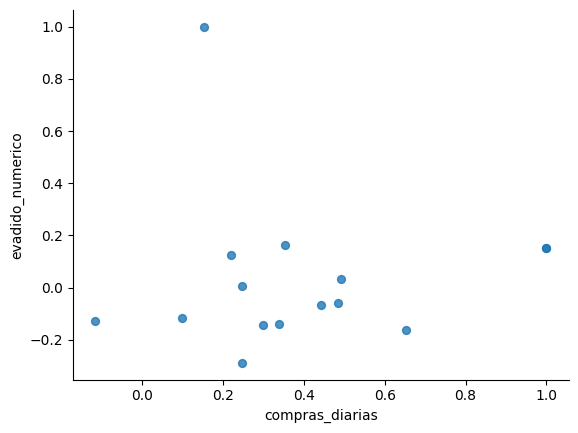

In [111]:
# @title 8. Compras di√°rias vs evadidos

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='compras_diarias', y='evadido_numerico', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## An√°lise multivariada

Explorar outras combina√ß√µes de vari√°veis que podem influenciar a evas√£o de clientes (por exemplo, clientes com contrato mensal e servi√ßo de internet fibra √≥ptica).


Explorando combina√ß√µes de vari√°veis categ√≥ricas e calculando a taxa de rotatividade de cada combina√ß√£o. Em seguida √© gerada visualiza√ß√£o dos resultados usando mapas de calor.




Analizando a combina√ß√£o entre contrato e servico_internet
Taxa de evadido:


servico_internet       dsl  fiber optic        no
contrato                                         
month-to-month    0.312450     0.528422  0.181651
one year          0.090444     0.185714  0.024129
two year          0.018721     0.070615  0.007541

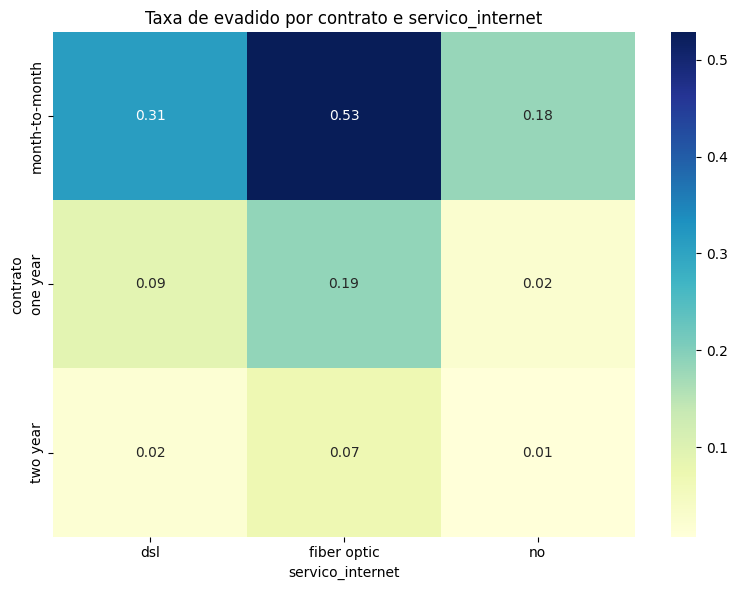


Analizando a combina√ß√£o entre metodo_pagamento e contrato
Taxa de evadido:


contrato                   month-to-month  one year  two year
metodo_pagamento                                             
bank transfer (automatic)        0.330592  0.094763  0.032759
credit card (automatic)          0.319569  0.099274  0.021739
electronic check                 0.519060  0.178273  0.076023
mailed check                     0.304865  0.066474  0.007614

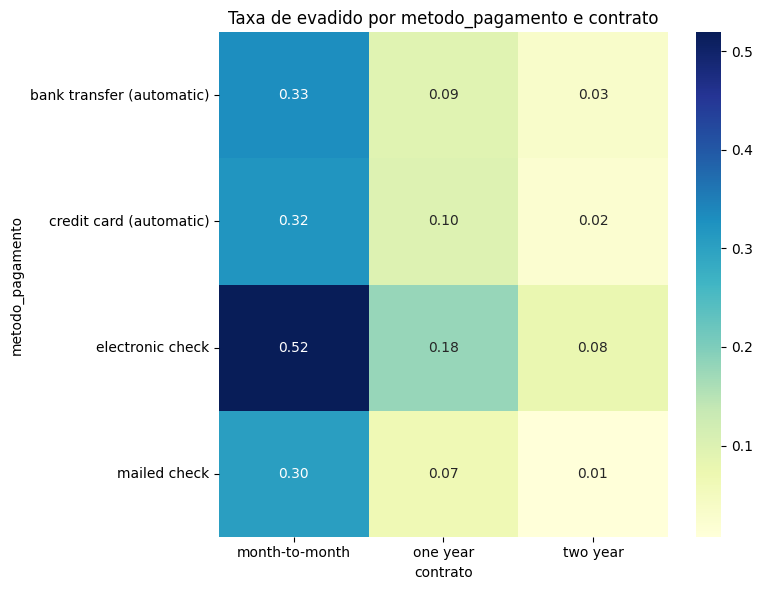


Analizando a combina√ß√£o entre contrato e seguranca_online
Taxa de evadido:


seguranca_online         0         1
contrato                            
month-to-month    0.442331  0.285906
one year          0.111462  0.105634
two year          0.026585  0.028758

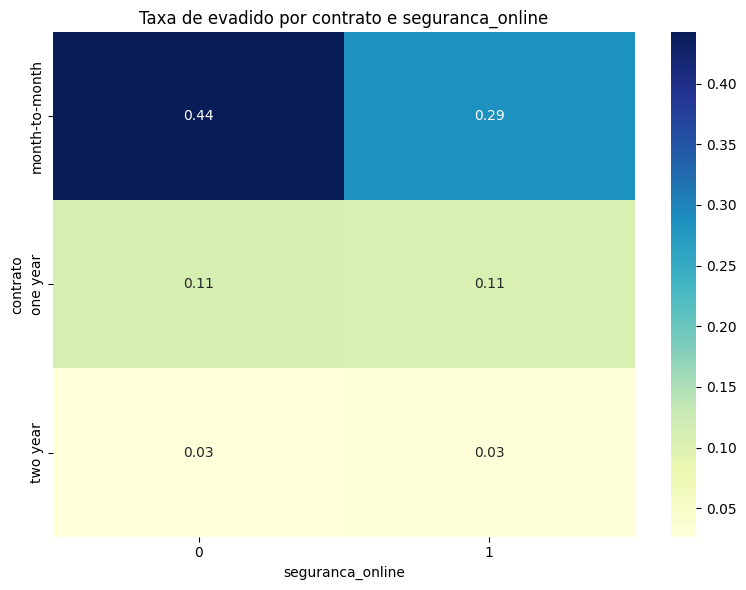

In [113]:
#@title .
categorical_cols = [col for col in df.columns
                    if df[col].dtype == 'object' and
                    col != 'id_cliente' and col != 'evadido' and df[col].nunique() < 10]

combinations_to_explore = [
    ('contrato', 'servico_internet'),
    ('metodo_pagamento', 'contrato'),
    ('contrato', 'seguranca_online')
]

for col1, col2 in combinations_to_explore:
    print(f"\nAnalizando a combina√ß√£o entre {col1} e {col2}")
    churn_proportion = df.groupby([col1, col2])['evadido'].value_counts(normalize=True).unstack().fillna(0)
    if '1' in churn_proportion.columns:
        churn_rate = churn_proportion['1'].unstack().fillna(0)
        print("Taxa de evadido:")
        display(churn_rate)

        plt.figure(figsize=(8, 6))
        sns.heatmap(churn_rate, annot=True, cmap='YlGnBu', fmt=".2f")
        plt.title(f'Taxa de evadido por {col1} e {col2}')
        plt.xlabel(col2)
        plt.ylabel(col1)
        plt.tight_layout()
        plt.show()
    else:
        print("Dados de rotatividade insuficientes para calcular a propor√ß√£o.")

## Resumo das causas potenciais

Compilado das principais observa√ß√µes e os fatores que parecem estar mais relacionados √† evas√£o de clientes com base na an√°lise.


In [117]:
# @title .
print("Relat√≥rio de An√°lise de Evas√£o de Clientes (Churn)\n")
print("Principais Observa√ß√µes e Fatores Relacionados √† Evas√£o:\n")

print("1. Distribui√ß√£o de evadidos:")
print(f"- A propor√ß√£o de clientes que evadiram ('1') √© de aproximadamente {churn_proportions['1']:.2f}%.")
print(f"- A propor√ß√£o de clientes que n√£o evadiram ('0') √© de aproximadamente {churn_proportions['0']:.2f}%.")
print(f"- Existem {churn_proportions['']:.2f}% de valores desconhecidos ('') na coluna evadido.")

print("\n2. Vari√°veis categ√≥ricas:")
print("- Tipo de Contrato: Clientes com contrato 'month-to-month' apresentam taxas de evas√£o significativamente mais altas.")
print("- Servi√ßo de Internet: Clientes com servi√ßo 'fiber optic' tendem a ter maior evas√£o em compara√ß√£o com 'dsl' ou sem servi√ßo de internet.")
print("- M√©todo de Pagamento: 'Electronic check' √© o m√©todo de pagamento associado √† maior taxa de evas√£o.")
print("- Servi√ßos Adicionais (Seguran√ßa Online, Backup Online, Prote√ß√£o dispositivo, Suporte Tecnico): A aus√™ncia desses servi√ßos est√° associada \n  a maiores taxas de evas√£o.")
print("- Fatura online: Clientes com 'fatura_online' tendem a ter uma taxa de evas√£o ligeiramente maior.")

print("\n3. Vari√°veis num√©ricas:")
print("- Gasto Mensal: Clientes que evadem geralmente t√™m 'gasto_mensal' mais altos.")
print("- Tempo de contrato: Clientes com menor tempo de contrato ('tenure') t√™m maior probabilidade de evas√£o.")
print("- Gasto Total: Clientes com 'gasto_total' mais baixos (que se relaciona com menor tempo de contrato) tamb√©m tendem a evadir mais.")

print("\n4. An√°lise Multivariada:")
print("- A combina√ß√£o de contrato 'month-to-month' e servi√ßo de internet 'fiber optic' resulta em uma alta taxa de evas√£o.")
print("- Clientes com contrato 'month-to-month' utilizando 'electronic check' como metodo de pagamento tamb√©m exibem alta evas√£o.")
print("- A aus√™ncia de seguran√ßa online para clientes com contrato 'month-to-month' est√° associada a uma evas√£o elevada.")

print("\nResumo dos Fatores Chave de Evas√£o:")
print("- Contratos de curto prazo ('month-to-month').")
print("- Servi√ßos de internet de alta velocidade ('fiber optic').")
print("- Utiliza√ß√£o de m√©todos de pagamento 'electronic check'.")
print("- Falta de servi√ßos de seguran√ßa online e suporte t√©cnico.")
print("- Baixo tempo de relacionamento com a empresa ('tempo_contrato').")
print("- Altos gastos mensais ('gasto_mensal').")

Relat√≥rio de An√°lise de Evas√£o de Clientes (Churn)

Principais Observa√ß√µes e Fatores Relacionados √† Evas√£o:

1. Distribui√ß√£o de evadidos:
- A propor√ß√£o de clientes que evadiram ('1') √© de aproximadamente 0.26%.
- A propor√ß√£o de clientes que n√£o evadiram ('0') √© de aproximadamente 0.71%.
- Existem 0.03% de valores desconhecidos ('') na coluna evadido.

2. Vari√°veis categ√≥ricas:
- Tipo de Contrato: Clientes com contrato 'month-to-month' apresentam taxas de evas√£o significativamente mais altas.
- Servi√ßo de Internet: Clientes com servi√ßo 'fiber optic' tendem a ter maior evas√£o em compara√ß√£o com 'dsl' ou sem servi√ßo de internet.
- M√©todo de Pagamento: 'Electronic check' √© o m√©todo de pagamento associado √† maior taxa de evas√£o.
- Servi√ßos Adicionais (Seguran√ßa Online, Backup Online, Prote√ß√£o dispositivo, Suporte Tecnico): A aus√™ncia desses servi√ßos est√° associada 
  a maiores taxas de evas√£o.
- Fatura online: Clientes com 'fatura_online' tendem a ter um

## Resumo:

### Principais conclus√µes da an√°lise de dados

* Aproximadamente 26% dos clientes no conjunto de dados apresentaram rotatividade.
* Clientes com contratos mensais apresentam taxas de rotatividade significativamente maiores.
* Clientes com servi√ßo de internet por fibra √≥ptica t√™m maior probabilidade de rotatividade.
* Cheque eletr√¥nico √© o m√©todo de pagamento mais fortemente associado √† rotatividade.
* A aus√™ncia de servi√ßos como seguran√ßa online, backup online, prote√ß√£o de dispositivos e suporte t√©cnico est√° associada a taxas de rotatividade mais altas.
* Clientes com mensalidades mais altas tendem a rotatividade com mais frequ√™ncia.
* Clientes com menor tempo de servi√ßo t√™m maior probabilidade de rotatividade.
* A combina√ß√£o de contratos mensais e servi√ßo de internet por fibra √≥ptica resulta em uma taxa de rotatividade particularmente alta.
* Clientes com contratos mensais que utilizam cheque eletr√¥nico tamb√©m apresentam alta rotatividade.
* A falta de seguran√ßa online para clientes com contratos mensais est√° fortemente associada √† alta rotatividade.

### Insights ou Pr√≥ximos Passos

* Concentre os esfor√ßos de reten√ß√£o em clientes com contratos mensais, especialmente aqueles com internet de fibra √≥ptica e que utilizam cheques eletr√¥nicos.
* Promova a ado√ß√£o de servi√ßos adicionais, como seguran√ßa online e suporte t√©cnico, principalmente para novos clientes ou aqueles com contratos de curto prazo.